# Predicting House Sale Price
**Kaggle housing data**

### Setting up the environment, data exploration and cleaning

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\PBANE\\OneDrive - Monsanto\\Migrated from My PC\\Documents\\DataScienceAnalytics\\Python\\PythonProjects\\ML_Kaggle\\House_Price'

In [47]:
# Basic imports
import numpy as np
import pandas as pd

In [48]:
# setting up the visualization basics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [49]:
# Ignore warning messages
import warnings
warnings.filterwarnings(action= 'ignore')

### 2. Data upload and initial exploration

In [119]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)

In [51]:
housingTrain = pd.read_csv("train.csv")
housingTest= pd.read_csv("test.csv")

In [52]:
trainData = housingTrain.copy()
testData = housingTest.copy()

In [53]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
testData.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,SaleCondition,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,1_Story_New,RH,80.0,11622,Pave,...,Normal,NoPool,1778.0,120,0
1,1_Story_New,RL,81.0,14267,Pave,...,Normal,NoPool,2658.0,36,0


In [121]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass        1460 non-null object
MSZoning          1460 non-null object
LotFrontage       1201 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null object
Alley             1460 non-null object
LotShape          1460 non-null object
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null object
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
YearBuilt         1460 non-null object
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exterior2nd       1460 non-null objec

We will remove the 'Id' column as this is just an identifyer seral number for each observations and will impact predictions if it goes into the model.

In [56]:
trainData = trainData.drop('Id', axis= 1)
testData = testData.drop('Id', axis= 1)

**Quick exploration with the dependent variable ('SalePrice')**

Text(0.5, 1.0, "Distributon of 'SalePrice'")

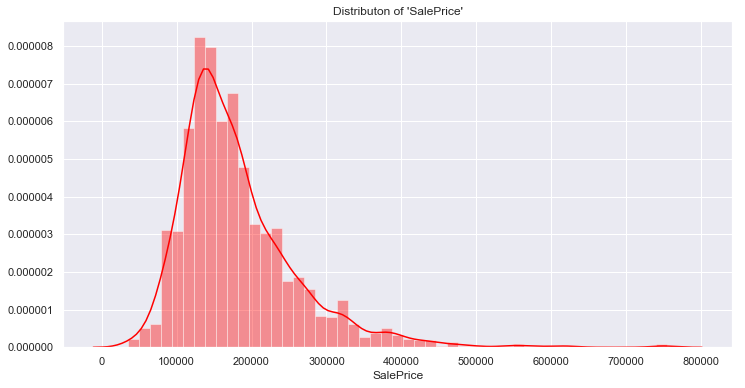

In [57]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['SalePrice'], color= 'red')
plt.title("Distributon of 'SalePrice'")

In [58]:
trainData['log_SalePrice']= np.log(trainData['SalePrice'])

Text(0.5, 1.0, "Distributon of log of 'SalePrice'")

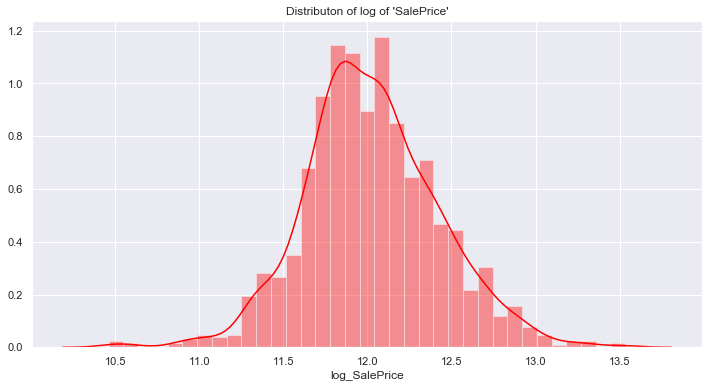

In [59]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['log_SalePrice'], color= 'red')
plt.title("Distributon of log of 'SalePrice'")

In [60]:
trainData= trainData.drop(['SalePrice'], axis= 1)

### 3. Adding new features

In [61]:
trainData['PoolCat']= pd.cut(trainData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])
testData['PoolCat']= pd.cut(testData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])

In [62]:
trainData= trainData.drop(['PoolArea'], axis= 1)
testData= testData.drop(['PoolArea'], axis= 1)

In [63]:
trainData['TotalSF']= trainData['TotalBsmtSF'] + trainData['1stFlrSF'] + trainData['2ndFlrSF']
testData['TotalSF']= testData['TotalBsmtSF'] + testData['1stFlrSF'] + testData['2ndFlrSF']

In [64]:
trainData['TotalPorchSF']= trainData['OpenPorchSF'] + trainData['EnclosedPorch'] + trainData['3SsnPorch'] + trainData['ScreenPorch']
testData['TotalPorchSF']= testData['OpenPorchSF'] + testData['EnclosedPorch'] + testData['3SsnPorch'] + testData['ScreenPorch']

In [65]:
trainData['RemodYrHapened']= trainData['YearRemodAdd'] - trainData['YearBuilt']
testData['RemodYrHapened']= testData['YearRemodAdd'] - testData['YearBuilt']

In [66]:
trainData= trainData.drop(['YearRemodAdd'], axis= 1)
testData= testData.drop(['YearRemodAdd'], axis= 1)

### 4. Correcting feature classes

**Some variable are categorical however they are represented as numerical. We will change them.**

In [67]:
# Function to convert numerical variables to str variables
def num_to_str(df, cols):
    for c in cols:
        df[c]= df[c].astype('str')

In [68]:
num_to_str(trainData, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt'])

In [69]:
trainData.loc[:, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
YearBuilt      1460 non-null object
YrSold         1460 non-null object
MoSold         1460 non-null object
GarageYrBlt    1460 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


In [70]:
num_to_str(testData, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt'])

In [71]:
testData.loc[:, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 4 columns):
YearBuilt      1459 non-null object
YrSold         1459 non-null object
MoSold         1459 non-null object
GarageYrBlt    1459 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


**MSSubClass has several labels which is not truly ordinal in nature. We will convert this as categorical variable.**

In [72]:
dict= {20: '1_Story_New',
      30: '1_Story_Old',
      40: '1_Story_Finished',
      45: '1.5_Story_Unfinished',
      50: '1.5_Story_Finished',
      60: '2_Story_New',
      70: '2_Story_Old',
      75: '2.5_Story',
      80: 'Split_Multi',
      85: 'Split_Foyer',
      90: 'Duplex',
      120: '1_Story_PUD_New',
      150: '1.5_Story_PUD',
       160: '2_Story_PUD_New',
      180: 'Multilevel_PUD',
      190: 'Fam_Coversion'}

In [73]:
trainData['MSSubClass']= trainData['MSSubClass'].map(dict)
testData['MSSubClass']= testData['MSSubClass'].map(dict)

In [74]:
trainData.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_SalePrice,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,2_Story_New,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,NoPool,2566,61,0
1,1_Story_New,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,NoPool,2524,0,0
2,2_Story_New,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,NoPool,2706,42,1
3,2_Story_Old,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,NoPool,2473,307,55


### 5. Missing value correction

In [75]:
def missingCount(df):
    ''' Display missing data count and percentage '''
    missing= pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns= ['variable', 'countMissing']
    missing['pctMissing']= round(missing['countMissing']/len(df), 3)
    missing= missing.loc[missing['countMissing'] > 0].sort_values('pctMissing', ascending = False)
    return missing

In [76]:
missingCount(trainData)

,variable,countMissing,pctMissing
69,PoolQC,1453,0.995
71,MiscFeature,1406,0.963
5,Alley,1369,0.938
70,Fence,1179,0.808
55,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
56,GarageType,81,0.055
58,GarageFinish,81,0.055
61,GarageQual,81,0.055
62,GarageCond,81,0.055


From the data descriptor we can see that for PoolQC, MiscFeature, Alley, Fence and FireplaceQu the mising data is actually a seperate class 'not available' or 'not present'. Howeverin case of PoolQC, MiscFeature and Alley more than 90% observation are from this class. This will greately reduce prediction power of these variables and we may consider to drop them. 

Lets create a function to replace all NaNs with 'No' in those columns.

In [77]:
def fillingNull(df, columns, string = 'No'):
    '''Fill missing data with a string '''
    for c in columns:
        df[c].fillna(string, inplace= True)

In [78]:
fillingNull(trainData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [79]:
fillingNull(testData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [80]:
missingCount(trainData)

,variable,countMissing,pctMissing
55,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
56,GarageType,81,0.055
58,GarageFinish,81,0.055
61,GarageQual,81,0.055
62,GarageCond,81,0.055
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025


Now, we can see four Garage feature are all aving 81 missing observations and all are basically having no garage. We shall replace this with 'No'

In [81]:
fillingNull(trainData, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish'], 'No')
fillingNull(testData, ['GarageType', 'GarageYrBlt','GarageQual', 'GarageCond', 'GarageFinish'], 'No')

In [82]:
missingCount(trainData)

,variable,countMissing,pctMissing
55,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025
31,BsmtFinType1,37,0.025
23,MasVnrType,8,0.005
24,MasVnrArea,8,0.005
40,Electrical,1,0.001


In [83]:
fillingNull(trainData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')
fillingNull(testData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')

In [84]:
missingCount(trainData)

,variable,countMissing,pctMissing
55,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [85]:
fillingNull(trainData, ['FireplaceQu'], 'No')
fillingNull(testData, ['FireplaceQu'], 'No')

In [86]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [87]:
missingCount(testData)

,variable,countMissing,pctMissing
2,LotFrontage,227,0.156
24,MasVnrArea,15,0.010
1,MSZoning,4,0.003
45,BsmtFullBath,2,0.001
75,SaleType,1,0.001
60,GarageArea,1,0.001
59,GarageCars,1,0.001
53,Functional,2,0.001
51,KitchenQual,1,0.001
46,BsmtHalfBath,2,0.001


### 6. Correlation stdy among numerical features

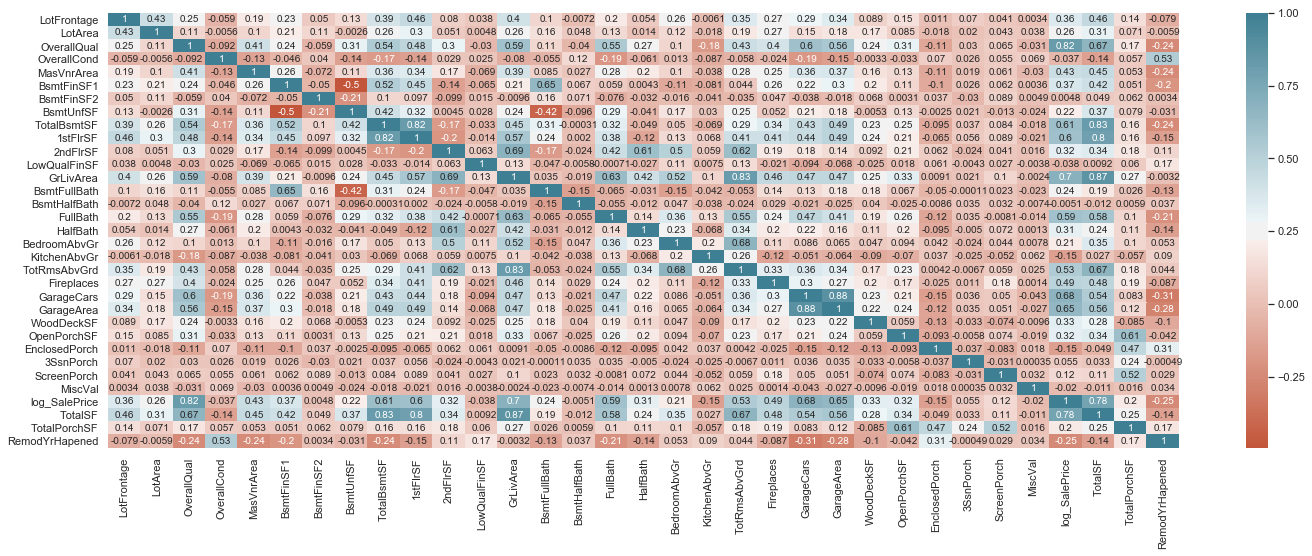

In [44]:
plt.figure(figsize= (24, 8))
cmap= sns.diverging_palette(20, 220, n= 400)
sns.heatmap(trainData.corr(), cmap= cmap, annot= True, cbar= True)

From the heat map we can see TotalSF exhibited high association with TotalBsmtSF, 1stFlrSF and GrLivAra. After examining correlation with our dependen variable we will keep TotalSF and remove rest 3. 
GarageCars has high colinearity (0.88) with GarageArea. We will remove GarageArea.

In [88]:
trainData= trainData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)
testData= testData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)

## Exploratory Analysis

In [89]:
trainData_num= trainData.select_dtypes(include= 'number')

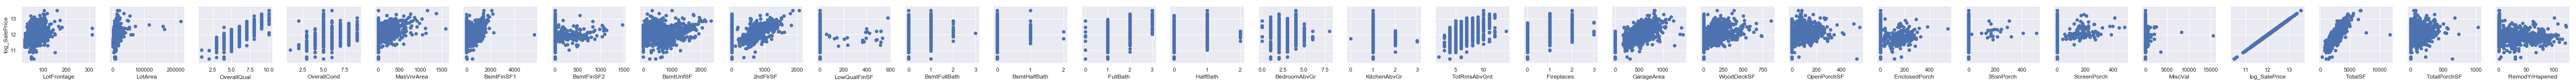

In [122]:
g= sns.PairGrid(data= trainData_num, x_vars= ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'log_SalePrice', 'TotalSF', 'TotalPorchSF',
       'RemodYrHapened'], y_vars= 'log_SalePrice')

g.map(plt.scatter)

In [113]:
trainData_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'log_SalePrice', 'TotalSF', 'TotalPorchSF',
       'RemodYrHapened'],
      dtype='object')

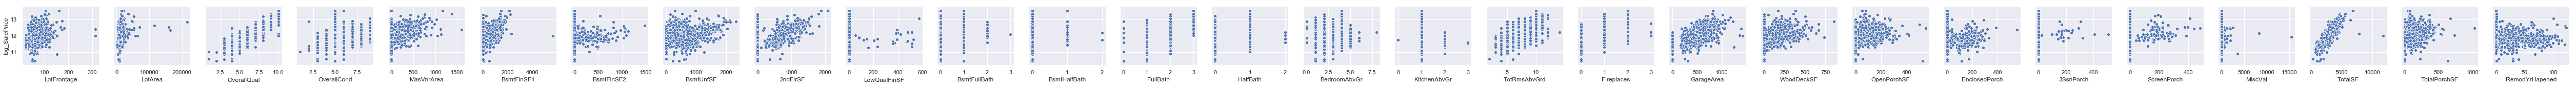

In [103]:
sns.pairplot(data= trainData_num, 
             y_vars= ['log_SalePrice'], 
             x_vars= ['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'TotalSF',
 'TotalPorchSF',
 'RemodYrHapened'] )

### Pipeline to make data ML ready ##

In [126]:
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,log_SalePrice,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,2_Story_New,RL,65.0,8450,Pave,...,12.247694,NoPool,2566,61,0
1,1_Story_New,RL,80.0,9600,Pave,...,12.109011,NoPool,2524,0,0
2,2_Story_New,RL,68.0,11250,Pave,...,12.317167,NoPool,2706,42,1
3,2_Story_Old,RL,60.0,9550,Pave,...,11.849398,NoPool,2473,307,55
4,2_Story_New,RL,84.0,14260,Pave,...,12.429216,NoPool,3343,84,0


In [127]:
testData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,SaleCondition,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,1_Story_New,RH,80.0,11622,Pave,...,Normal,NoPool,1778.0,120,0
1,1_Story_New,RL,81.0,14267,Pave,...,Normal,NoPool,2658.0,36,0
2,2_Story_New,RL,74.0,13830,Pave,...,Normal,NoPool,2557.0,34,1
3,2_Story_New,RL,78.0,9978,Pave,...,Normal,NoPool,2530.0,36,0
4,1_Story_PUD_New,RL,43.0,5005,Pave,...,Normal,NoPool,2560.0,226,0


In [128]:
X_train = trainData.drop('log_SalePrice', axis= 1)

In [129]:
y_train = trainData['log_SalePrice'].copy()

In [130]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [131]:
X_train_num = X_train.select_dtypes(include= [np.number])
X_train_cat = X_train.select_dtypes(exclude= [np.number])

In [132]:
num_attribs= list(X_train_num)
cat_attribs= list(X_train_cat)

In [133]:
num_pipeline= Pipeline([
    ('num_imputer', SimpleImputer(strategy= 'median')),
    ('scaller', StandardScaler()),
])

In [134]:

cat_pipeline= Pipeline([
    ('cat_imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(sparse= False)),
])

In [135]:
fullPipeline= ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [136]:
X_train_trns= fullPipeline.fit_transform(X_train)

In [137]:
pd.DataFrame(X_train_trns)

,0,1,2,3,4,...,535,536,537,538,539
0,-0.220875,-0.207142,0.651479,-0.517200,0.514104,...,1.0,0.0,0.0,1.0,0.0
1,0.460320,-0.091886,-0.071836,2.179628,-0.570750,...,1.0,0.0,0.0,1.0,0.0
2,-0.084636,0.073480,0.651479,-0.517200,0.325915,...,1.0,0.0,0.0,1.0,0.0
3,-0.447940,-0.096897,0.651479,-0.517200,-0.570750,...,0.0,0.0,0.0,1.0,0.0
4,0.641972,0.375148,1.374795,-0.517200,1.366489,...,1.0,0.0,0.0,1.0,0.0
5,0.687385,0.360616,-0.795151,-0.517200,-0.570750,...,1.0,0.0,0.0,1.0,0.0
6,0.233255,-0.043379,1.374795,-0.517200,0.458754,...,1.0,0.0,0.0,1.0,0.0
7,-0.039223,-0.013513,0.651479,0.381743,0.757643,...,1.0,0.0,0.0,1.0,0.0
8,-0.856657,-0.440659,0.651479,-0.517200,-0.570750,...,0.0,0.0,0.0,1.0,0.0
9,-0.902070,-0.310370,-0.795151,0.381743,-0.570750,...,1.0,0.0,0.0,1.0,0.0


### Training model and selection the best model

__We will use processed and transformed training data to train some models and check through cross validation for all models to select our best model.__
- Linear regression
- DecisionTree
- Randomforest
- XGBoost
- AddaBoost
- SVM


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### Linear regression

In [139]:
linReg= LinearRegression()
linReg.fit(X_train_trns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
y_train_pred= linReg.predict(X_train_trns)

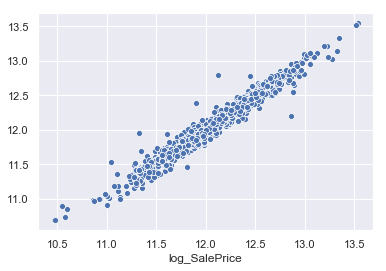

In [141]:
sns.scatterplot(x= y_train, y= y_train_pred)

In [143]:
linReg_RMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
print(linReg_RMSE)

0.08220003233993423


In [144]:
from sklearn.model_selection import cross_val_score

In [148]:
cross_val_score(linReg, X_train_trns, y_train, cv= 10, scoring= 'neg_mean_squared_error').mean()

-5.274572705373572e+17

### SVM

**Linear SVR**

In [149]:
from sklearn.svm import LinearSVR

In [156]:
svmReg= LinearSVR(epsilon= .1)
svmReg.fit(X_train_trns, y_train)
y_train_pred= svmReg.predict(X_train_trns)

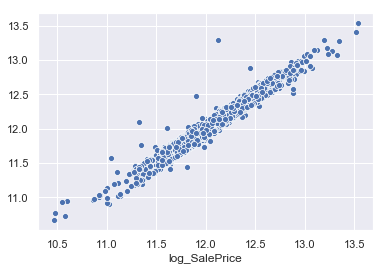

In [157]:
sns.scatterplot(x= y_train, y= y_train_pred)

In [158]:
svmReg_RMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
svmReg_RMSE

0.096059986067799

In [167]:
np.sqrt(-1*cross_val_score(svmReg, X_train_trns, y_train, cv= 5, scoring= 'neg_mean_squared_error')).mean()

0.17076307391889095

**SVM polinomial kernel**

In [160]:
from sklearn.svm import SVR

In [161]:
svmRegPoly= SVR(kernel= 'poly', degree= 2)
svmRegPoly.fit(X_train_trns, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
y_train_pred= svmRegPoly.predict(X_train_trns)

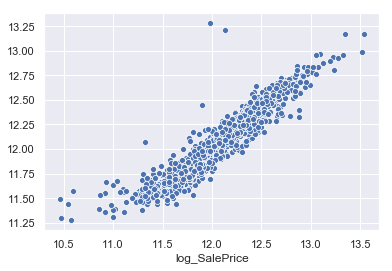

In [163]:
sns.scatterplot(x= y_train, y= y_train_pred)

In [164]:
svmRegPoly_RMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
svmRegPoly_RMSE

0.14894435277631604

In [166]:
np.sqrt(-1*cross_val_score(svmRegPoly, X_train_trns, y_train, cv=10, scoring= 'neg_mean_squared_error')).mean()

0.16164845416175405

### Decisiontree and ensembles

In [168]:
from sklearn.tree import DecisionTreeRegressor

In [169]:
treeReg= DecisionTreeRegressor()
treeReg.fit(X_train_trns, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [170]:
y_train_pred= treeReg.predict(X_train_trns)

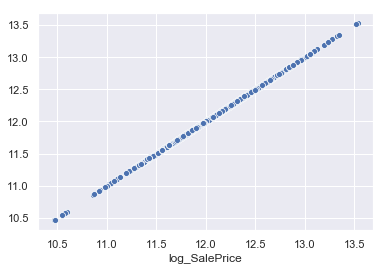

In [171]:
sns.scatterplot(x= y_train, y= y_train_pred)

In [172]:
treeReg_RMSE= np.sqrt(mean_squared_error(y_train, y_train_pred))
treeReg_RMSE

2.1138545211693494e-05

In [173]:
np.sqrt(-1*cross_val_score(treeReg, X_train_trns, y_train, cv=10, scoring= 'neg_mean_squared_error')).mean()

0.2120878265659603